## Apriori Algorithm in Python
- Apriori algorithm is a classical algorithm in data mining that is used for mining frequent itemsets and association rule mining.
- Association rule mining is a technique to identify frequent patterns and associations among a set of items.

In order to select the interesting rules out of multiple possible rules from this small business scenario, we will be using the following measures:

- Support
- Confidence
- List
- Conviction

# 1) Import Libraries

In [449]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style ='whitegrid')
pd.set_option('display.max_columns',None)

import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings,datetime,calendar
warnings.filterwarnings('ignore')

# 2) Reading Data

In [335]:
data = pd.read_csv('OnlineRetail.csv', encoding= 'unicode_escape')

In [336]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [337]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [338]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# 3) Data Cleaning

In [339]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### Abnormal Values

In [340]:
data[data['Quantity']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


In [341]:
data[data['UnitPrice']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,01-12-2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,01-12-2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,01-12-2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,01-12-2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,01-12-2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,08-12-2011 10:33,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,08-12-2011 13:58,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,08-12-2011 13:58,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,08-12-2011 14:06,0.0,NaN,United Kingdom


In [342]:
data=data.drop(data[data['Quantity']<=0].index)
data=data.drop(data[data['UnitPrice']<=0].index)
data.reset_index(inplace=True)
data.drop(['index'],axis = 1,inplace=True)

In [343]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


### Nulls

In [344]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [345]:
'No ID' in data['CustomerID'].tolist()

False

In [346]:
data['CustomerID'].fillna('No ID',inplace=True)
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [347]:
data['Member'] = data['CustomerID'].apply(lambda x : 0 if x =='No ID' else 1)
data['Member'].value_counts()

1    397884
0    132220
Name: Member, dtype: int64

In [348]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,1
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
530099,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France,1
530100,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France,1
530101,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France,1
530102,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France,1


In [349]:
data.duplicated().sum()

5226

In [350]:
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True)
data.drop(['index'],axis = 1,inplace=True)
data.shape

(524878, 9)

# 4) Data Processing

In [351]:
def ShowDetails() : 
    global data
    for col in data.columns : 
        print(f' for feature {col}')
        print(f'Number of Unique Values {len(data[col].unique())}')
        print(f' Random Value {data[col][np.random.randint(data.shape[0])]}')
        print(f' Random Value {data[col][np.random.randint(data.shape[0])]}')
        print(f' Random Value {data[col][np.random.randint(data.shape[0])]}')
        print('-------------------------------------------------------')

In [352]:
ShowDetails()

 for feature InvoiceNo
Number of Unique Values 19960
 Random Value 571909
 Random Value 559548
 Random Value 542664
-------------------------------------------------------
 for feature StockCode
Number of Unique Values 3922
 Random Value 20936
 Random Value 21385
 Random Value 22945
-------------------------------------------------------
 for feature Description
Number of Unique Values 4026
 Random Value JUMBO STORAGE BAG SKULLS
 Random Value DOLLY GIRL LUNCH BOX
 Random Value CHILDRENS CUTLERY POLKADOT PINK
-------------------------------------------------------
 for feature Quantity
Number of Unique Values 375
 Random Value 2
 Random Value 6
 Random Value 9
-------------------------------------------------------
 for feature InvoiceDate
Number of Unique Values 18499
 Random Value 18-05-2011 13:11
 Random Value 05-01-2011 13:53
 Random Value 28-01-2011 14:25
-------------------------------------------------------
 for feature UnitPrice
Number of Unique Values 1291
 Random Value 4.95
 

In [353]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,1
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1


In [354]:
data[data['InvoiceNo']=='536365']['InvoiceDate'].unique()

array(['01-12-2010 08:26'], dtype=object)

In [355]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],format = '%d-%m-%Y %H:%M')
data['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
524873   2011-12-09 12:50:00
524874   2011-12-09 12:50:00
524875   2011-12-09 12:50:00
524876   2011-12-09 12:50:00
524877   2011-12-09 12:50:00
Name: InvoiceDate, Length: 524878, dtype: datetime64[ns]

In [356]:
data['InvoiceDate'].min(),data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [357]:
data['InvoiceDate'].max() - data['InvoiceDate'].min()

Timedelta('373 days 04:24:00')

In [358]:
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day
data['Hour'] = data['InvoiceDate'].dt.hour
data['WeekDay'] = data['InvoiceDate'].dt.day_name()
data['WeekDayCase'] = data['WeekDay'].apply(
    lambda x : 'WeekEnd' if str(x).lower() in 
    ['saturday','sunday'] else 'WeekDay')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,1,2011,12,9,12,Friday,WeekDay
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,1,2011,12,9,12,Friday,WeekDay
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay


In [359]:
data['WeekDayCase'].value_counts()

WeekDay    462539
WeekEnd     62339
Name: WeekDayCase, dtype: int64

In [360]:
data['WeekDay'].value_counts()

Thursday     100213
Tuesday       98726
Monday        92466
Wednesday     91467
Friday        79667
Sunday        62339
Name: WeekDay, dtype: int64

In [361]:
def DayPart(H) :
    
    if H <6 : 
        return 'Early Morning'
    elif 6<= H< 12 : 
        return 'Morning'
    elif 12<= H< 15 : 
        return 'Noon'
    elif 15<= H< 19 : 
        return 'Evening'
    else : 
        return 'Night'

In [362]:
data['DayPart'] = data['Hour'].apply(lambda x : DayPart(int(x)))

In [363]:
data['DayPart'].value_counts()

Noon       211036
Evening    163759
Morning    145878
Night        4205
Name: DayPart, dtype: int64

In [364]:
data['Desc Char Length'] = data['Description'].apply(
    lambda x :  len(x))
data['Desc Word Length'] = data['Description'].apply(
    lambda x :  len(x.split()))
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,19,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,35,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5


In [365]:
data['Desc Char Length'].min(),data['Desc Char Length'].max()

(6, 35)

In [366]:
data[data['Desc Char Length']==6]['Description'].unique()

array(['Manual'], dtype=object)

In [367]:
data[data['Desc Char Length']==35]['Description'].unique()

array(['KNITTED UNION FLAG HOT WATER BOTTLE',
       'ROUND SNACK BOXES SET OF4 WOODLAND ',
       'CHARLIE & LOLA WASTEPAPER BIN FLORA',
       'CLEAR DRAWER KNOB ACRYLIC EDWARDIAN',
       'COLOUR GLASS T-LIGHT HOLDER HANGING',
       'CLASSIC METAL BIRDCAGE PLANT HOLDER',
       'FRIDGE MAGNETS LES ENFANTS ASSORTED',
       'SET/20 RED RETROSPOT PAPER NAPKINS ',
       'DISCO BALL ROTATOR BATTERY OPERATED',
       'BLUE NEW BAROQUE CANDLESTICK CANDLE',
       'GREEN DRAWER KNOB ACRYLIC EDWARDIAN',
       'SET/5 RED RETROSPOT LID GLASS BOWLS',
       'ROTATING SILVER ANGELS T-LIGHT HLDR',
       'SQUARECUSHION COVER PINK UNION FLAG',
       'SET 12 LAVENDER  BOTANICAL T-LIGHTS',
       'MAGIC DRAWING SLATE CIRCUS PARADE  ',
       'PAINTED METAL STAR WITH HOLLY BELLS',
       'PAINTED METAL HEART WITH HOLLY BELL',
       'FOLDING UMBRELLA PINKWHITE POLKADOT',
       'FOLDING UMBRELLA WHITE/RED POLKADOT',
       'FOLDING UMBRELLA RED/WHITE POLKADOT',
       'SET OF 20 VINTAGE CHRISTMA

In [368]:
data['Desc Word Length'].min(),data['Desc Word Length'].max()

(1, 8)

In [369]:
data[data['Desc Word Length']==1]['Description'].unique()

array(['POSTAGE', 'CARRIAGE', 'Manual', 'SOMBRERO ', 'SAMPLES'],
      dtype=object)

In [370]:
data[data['Desc Word Length']==8]['Description'].unique()

array(['SET OF 2 TEA TOWELS APPLE AND PEARS',
       'SET OF 6 3D KIT CARDS FOR KIDS',
       'SET OF 12 MINI BUNNIES IN A BUCKET',
       'HEN HOUSE W FAMILY IN BARN & NEST',
       'MAXWELL 2 TONE BLUE 60 PAGE PHOTO A',
       'FOOD COVER WITH BEADS , SET 2 SIZES',
       'SET OF 60 I LOVE LONDON CAKE CASES ',
       'SET 10 CARDS 12 DAYS OF XMAS 17059'], dtype=object)

In [371]:
AllDescription = ' '.join(data['Description'].tolist())
AllDescription = ' '.join([(i).lower() 
                           for i in AllDescription.split()])
len(AllDescription)

14392144

In [372]:
len(AllDescription.split())

2303213

In [373]:
AllDescription[:1000]

"white hanging heart t-light holder white metal lantern cream cupid hearts coat hanger knitted union flag hot water bottle red woolly hottie white heart. set 7 babushka nesting boxes glass star frosted t-light holder hand warmer union jack hand warmer red polka dot assorted colour bird ornament poppy's playhouse bedroom poppy's playhouse kitchen feltcraft princess charlotte doll ivory knitted mug cosy box of 6 assorted colour teaspoons box of vintage jigsaw blocks box of vintage alphabet blocks home building block word love building block word recipe box with metal heart doormat new england jam making set with jars red coat rack paris fashion yellow coat rack paris fashion blue coat rack paris fashion bath building block word alarm clock bakelike pink alarm clock bakelike red alarm clock bakelike green panda and bunnies sticker sheet stars gift tape inflatable political globe vintage heads and tails card game set/2 red retrospot tea towels round snack boxes set of4 woodland spaceboy lu

In [374]:
MostRepeatedWords = {}

for Word in AllDescription.split() : 
    if Word in MostRepeatedWords.keys() : 
        MostRepeatedWords[Word] +=1
    else : 
        MostRepeatedWords[Word] =1
MostRepeatedWords

{'white': 20198,
 'hanging': 16452,
 'heart': 37841,
 't-light': 14063,
 'holder': 15710,
 'metal': 20396,
 'lantern': 2270,
 'cream': 7760,
 'cupid': 333,
 'hearts': 4910,
 'coat': 1570,
 'hanger': 2145,
 'knitted': 786,
 'union': 5344,
 'flag': 1745,
 'hot': 10293,
 'water': 9771,
 'bottle': 11463,
 'red': 41742,
 'woolly': 438,
 'hottie': 438,
 'heart.': 438,
 'set': 53069,
 '7': 623,
 'babushka': 3155,
 'nesting': 498,
 'boxes': 3145,
 'glass': 11527,
 'star': 5948,
 'frosted': 154,
 'hand': 4796,
 'warmer': 4479,
 'jack': 3723,
 'polka': 194,
 'dot': 107,
 'assorted': 7359,
 'colour': 6040,
 'bird': 5743,
 'ornament': 1476,
 "poppy's": 1422,
 'playhouse': 1422,
 'bedroom': 425,
 'kitchen': 3455,
 'feltcraft': 7041,
 'princess': 1164,
 'charlotte': 6213,
 'doll': 2183,
 'ivory': 7943,
 'mug': 7917,
 'cosy': 1276,
 'box': 23554,
 'of': 52015,
 '6': 12865,
 'teaspoons': 210,
 'vintage': 32964,
 'jigsaw': 1623,
 'blocks': 502,
 'alphabet': 3830,
 'home': 9275,
 'building': 1686,
 'blo

In [375]:
len(MostRepeatedWords.keys())

2351

In [376]:
MostRepeatedWords=  {k:v for k,v in sorted(
    MostRepeatedWords.items(),key = lambda
    item: item[1],reverse = True) }
MostRepeatedWords

{'set': 53069,
 'of': 52015,
 'bag': 50823,
 'red': 41742,
 'heart': 37841,
 'retrospot': 34124,
 'vintage': 32964,
 'design': 29200,
 'pink': 28869,
 'christmas': 24587,
 'box': 23554,
 'jumbo': 20724,
 'cake': 20681,
 'metal': 20396,
 'white': 20198,
 'blue': 18804,
 'lunch': 18007,
 '3': 17893,
 'sign': 16677,
 'hanging': 16452,
 'holder': 15710,
 'pack': 15319,
 'paper': 14135,
 't-light': 14063,
 'small': 13945,
 'card': 13058,
 '6': 12865,
 'decoration': 12716,
 'wooden': 12435,
 'polkadot': 12228,
 'cases': 11721,
 'glass': 11527,
 'tea': 11519,
 'bottle': 11463,
 '12': 11191,
 'in': 10959,
 'and': 10606,
 'spaceboy': 10570,
 'hot': 10293,
 'water': 9771,
 'with': 9519,
 'large': 9428,
 'pantry': 9403,
 'home': 9275,
 'tin': 9191,
 'rose': 9163,
 'paisley': 9149,
 '4': 8925,
 'green': 8865,
 'ceramic': 8757,
 'regency': 8613,
 'doormat': 8255,
 'dolly': 8221,
 'mini': 7970,
 'ivory': 7943,
 'mug': 7917,
 'bunting': 7881,
 'love': 7793,
 'cream': 7760,
 'girl': 7601,
 'party': 74

In [377]:
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [378]:
data['Country'].replace('Israel','Palestine',inplace=True)
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Palestine', 'Greece', 'Hong Kong',
       'Singapore', 'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [379]:
ContinentsDict = {'Europe':['United Kingdom','France','Netherlands','Germany','Norway'
                            ,'EIRE','Switzerland','Spain', 'Poland', 'Portugal','Italy'
                            ,'Belgium','Lithuania','Iceland','Channel Islands','Denmark'
                            ,'Cyprus','Sweden','Finland','Austria','Greece','Czech Republic'
                            ,'European Community','Malta'],
              'Asia':['Japan','Bahrain','Palestine','Hong Kong','Singapore','Lebanon',
                      'United Arab Emirates','Saudi Arabia'],
              'Americans':['Canada',  'Brazil', 'USA'],
              'Other':['Australia','Unspecified','RSA']}
ContinentsDict

{'Europe': ['United Kingdom',
  'France',
  'Netherlands',
  'Germany',
  'Norway',
  'EIRE',
  'Switzerland',
  'Spain',
  'Poland',
  'Portugal',
  'Italy',
  'Belgium',
  'Lithuania',
  'Iceland',
  'Channel Islands',
  'Denmark',
  'Cyprus',
  'Sweden',
  'Finland',
  'Austria',
  'Greece',
  'Czech Republic',
  'European Community',
  'Malta'],
 'Asia': ['Japan',
  'Bahrain',
  'Palestine',
  'Hong Kong',
  'Singapore',
  'Lebanon',
  'United Arab Emirates',
  'Saudi Arabia'],
 'Americans': ['Canada', 'Brazil', 'USA'],
 'Other': ['Australia', 'Unspecified', 'RSA']}

In [380]:
def GetContinent(Country) : 
    global ContinentsDict
    for Key in ContinentsDict.keys() : 
        if Country in ContinentsDict[Key] : 
            return Key
    
data['Continent'] = data['Country'].apply(lambda x: GetContinent(x))

In [381]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length,Continent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5,Europe
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,19,3,Europe
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,Europe
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,35,6,Europe
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,27,5,Europe
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,28,4,Europe
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,29,4,Europe
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,31,4,Europe


In [382]:
data['TotalPrice'] = data.apply(lambda x : x['Quantity'] * x['UnitPrice'],axis=1)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length,Continent,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5,Europe,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,19,3,Europe,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,Europe,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,35,6,Europe,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,Europe,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,27,5,Europe,10.20
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,28,4,Europe,12.60
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,29,4,Europe,16.60
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,31,4,Europe,16.60


In [383]:
data['Quantity'].min(),data['Quantity'].max()

(1, 80995)

In [384]:
data['UnitPrice'].min(),data['UnitPrice'].max()

(0.001, 13541.33)

In [385]:
data['TotalPrice'].min(),data['TotalPrice'].max()

(0.001, 168469.6)

In [386]:
data[data['InvoiceNo']=='536365']['StockCode'].unique()

array(['85123A', '71053', '84406B', '84029G', '84029E', '22752', '21730'],
      dtype=object)

In [387]:
for i in data['InvoiceNo'].unique()[:10] : 
    print(f'for invoice number {i}')
    print(data[data['InvoiceNo']==i]['StockCode'].unique())
    print('--------------------------------------------------------')

for invoice number 536365
['85123A' '71053' '84406B' '84029G' '84029E' '22752' '21730']
--------------------------------------------------------
for invoice number 536366
['22633' '22632']
--------------------------------------------------------
for invoice number 536367
['84879' '22745' '22748' '22749' '22310' '84969' '22623' '22622' '21754'
 '21755' '21777' '48187']
--------------------------------------------------------
for invoice number 536368
['22960' '22913' '22912' '22914']
--------------------------------------------------------
for invoice number 536369
['21756']
--------------------------------------------------------
for invoice number 536370
['22728' '22727' '22726' '21724' '21883' '10002' '21791' '21035' '22326'
 '22629' '22659' '22631' '22661' '21731' '22900' '21913' '22540' '22544'
 '22492' 'POST']
--------------------------------------------------------
for invoice number 536371
['22086']
--------------------------------------------------------
for invoice number 5363

In [388]:
SeasonsDict = {'Winter':[12,1,2],'Spring':[3,4,5],'Summer':[6,7,8],'Fall':[9,10,11]}


data['Season'] = data['Month'].apply(lambda x : [i for i in list(SeasonsDict.keys()) if int(x) in SeasonsDict[i]][0])
data['Season'].value_counts()

Fall      189441
Winter    126766
Summer    108375
Spring    100296
Name: Season, dtype: int64

In [389]:
data[data['Season']=='Fall']['Month'].unique()

array([ 9, 10, 11], dtype=int64)

In [390]:
data[data['Season']=='Summer']['Month'].unique()

array([6, 7, 8], dtype=int64)

In [391]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length,Continent,TotalPrice,Season
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5,Europe,15.30,Winter
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,19,3,Europe,20.34,Winter
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,Europe,22.00,Winter
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,35,6,Europe,20.34,Winter
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,Europe,20.34,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,27,5,Europe,10.20,Winter
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,28,4,Europe,12.60,Winter
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,29,4,Europe,16.60,Winter
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,31,4,Europe,16.60,Winter


In [392]:
data['WeekEnd Case'] = data['WeekDay'].apply(
    lambda x : 'WeekEnd' if x in ['Sunday','Sunday'] else 'WeekDay')
data['WeekEnd Case'].value_counts()

WeekDay    462539
WeekEnd     62339
Name: WeekEnd Case, dtype: int64

In [393]:
data[data['WeekEnd Case']=='WeekEnd']['WeekDay'].unique()

array(['Sunday'], dtype=object)

In [394]:
data[data['WeekEnd Case']=='WeekDay']['WeekDay'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday'],
      dtype=object)

In [395]:
data['WeekDay'].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Sunday', 'Monday', 'Tuesday'],
      dtype=object)

# 5 ) Data Visualization

In [396]:
def CPlot(data,feature) : 
    fig, ax = plt.subplots(figsize=(10,6))
    sns.countplot(x=feature, data=data,facecolor=(0, 0, 0, 0),
                  linewidth=5,edgecolor=sns.color_palette("dark", 3))
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

def KPlot(data,feature,Limit=0) : 
    fig, ax = plt.subplots(figsize=(10,6))
    if Limit == 0 : 
        sns.kdeplot(data[feature], shade=True)
    else : 
        Data = data[data[feature]<=Limit]
        sns.kdeplot(Data[feature], shade=True)
def BPlot(data,feature1,feature2 = None,hue = None) : 
    fig, ax = plt.subplots(figsize=(10,6))
    if feature2 ==  None and hue == None : 
        sns.boxplot(data[feature1],width=0.3,color='r')
    elif  feature2 !=  None and hue == None :
        sns.boxplot(x = data[feature1],y=data[feature2],width=0.3,color='r')
    elif  feature2 !=  None and hue != None :
        sns.boxplot(x = data[feature1],y=data[feature2],hue=data[hue],width=0.3,color='r')
        
def JPlot(data,feature1,feature2,Type = 'scatter') : 
    sns.jointplot(data=data, x=feature1, y=feature2, kind=Type)   
    
    
def Pie(data,feature,Limit=20) : 
    fig, ax = plt.subplots(figsize=(10,6))
    plt.pie(data[feature].value_counts()[:Limit],labels=list(
        data[feature].value_counts()[:Limit].index),
        autopct ='%1.2f%%' , labeldistance = 1.1,
            explode = [0.05 for i in range(len(data[feature].value_counts()[:Limit]))] )
    plt.show()     

In [397]:
Data = data[::100]
Data.shape,data.shape

((5249, 22), (524878, 22))

In [398]:
Data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length,Continent,TotalPrice,Season,WeekEnd Case
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5,Europe,15.30,Winter,WeekDay
100,536378,84519A,TOMATO CHARLIE+LOLA COASTER SET,6,2010-12-01 09:37:00,2.95,14688.0,United Kingdom,1,2010,12,1,9,Wednesday,WeekDay,Morning,31,4,Europe,17.70,Winter,WeekDay
200,536389,85014B,RED RETROSPOT UMBRELLA,6,2010-12-01 10:03:00,5.95,12431.0,Australia,1,2010,12,1,10,Wednesday,WeekDay,Morning,22,3,Other,35.70,Winter,WeekDay
300,536398,22449,SILK PURSE BABUSHKA PINK,6,2010-12-01 10:52:00,3.35,13448.0,United Kingdom,1,2010,12,1,10,Wednesday,WeekDay,Morning,24,4,Europe,20.10,Winter,WeekDay
400,536404,84992,72 SWEETHEART FAIRY CAKE CASES,24,2010-12-01 11:29:00,0.55,16218.0,United Kingdom,1,2010,12,1,11,Wednesday,WeekDay,Morning,30,5,Europe,13.20,Winter,WeekDay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524400,581498,22384,LUNCH BAG PINK POLKADOT,1,2011-12-09 10:26:00,4.96,No ID,United Kingdom,0,2011,12,9,10,Friday,WeekDay,Morning,23,4,Europe,4.96,Winter,WeekDay
524500,581498,84029E,RED WOOLLY HOTTIE WHITE HEART.,4,2011-12-09 10:26:00,8.29,No ID,United Kingdom,0,2011,12,9,10,Friday,WeekDay,Morning,30,5,Europe,33.16,Winter,WeekDay
524600,581516,23355,HOT WATER BOTTLE KEEP CALM,8,2011-12-09 11:26:00,4.95,14422.0,United Kingdom,1,2011,12,9,11,Friday,WeekDay,Morning,26,5,Europe,39.60,Winter,WeekDay
524700,581571,23326,HANGING MINI COLOURED BOTTLES,6,2011-12-09 12:00:00,0.63,15311.0,United Kingdom,1,2011,12,9,12,Friday,WeekDay,Noon,29,4,Europe,3.78,Winter,WeekDay


In [399]:
Data = data.sample(frac = 0.01)
Data.shape,data.shape

((5249, 22), (524878, 22))

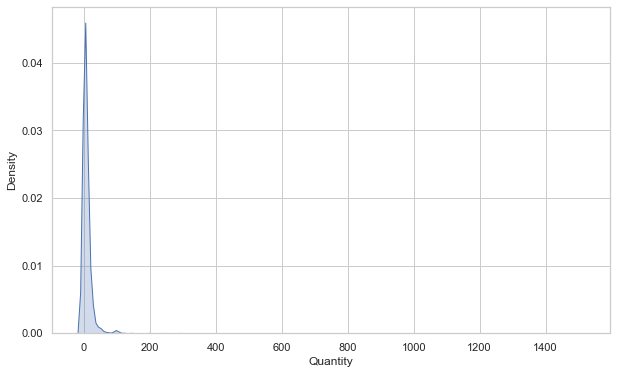

In [400]:
KPlot(Data,'Quantity')

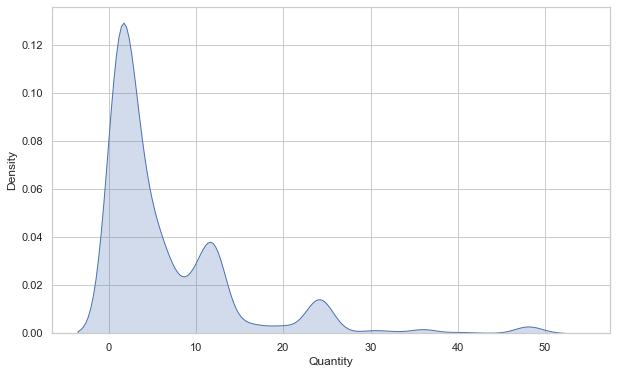

In [401]:
KPlot(Data,'Quantity',50)

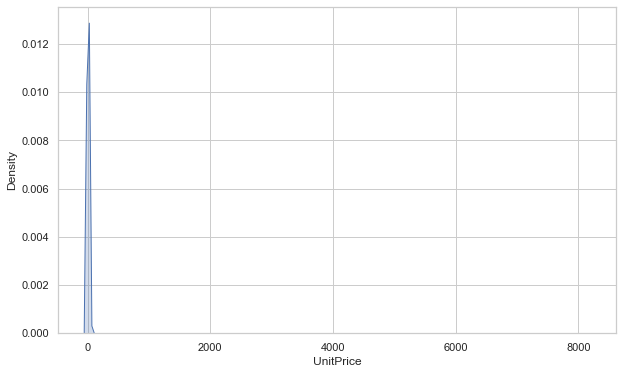

In [402]:
KPlot(Data,'UnitPrice')

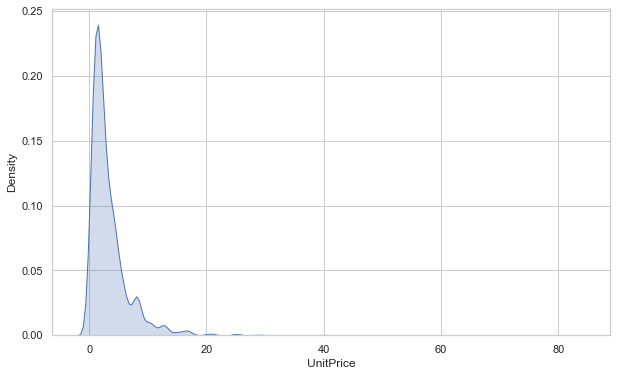

In [403]:
KPlot(Data,'UnitPrice',100)

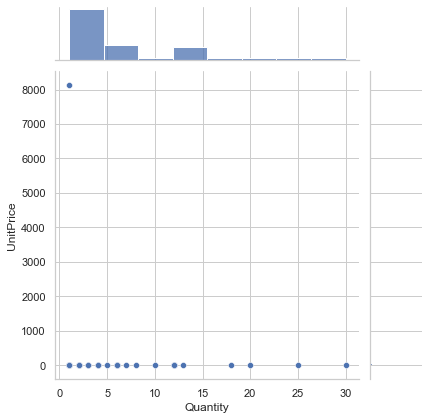

In [404]:
JPlot(Data[::100] ,'Quantity','UnitPrice')

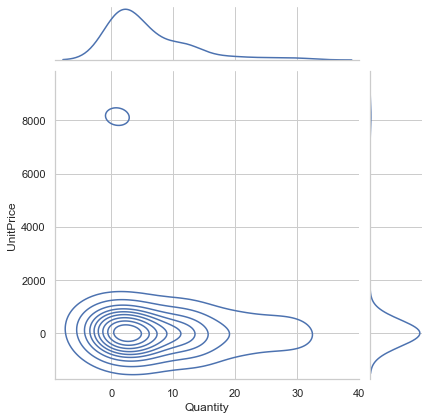

In [405]:
JPlot(Data[::100] ,'Quantity','UnitPrice','kde')

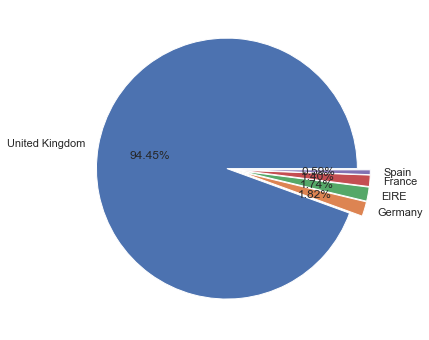

In [406]:
Pie(Data,'Country',5)

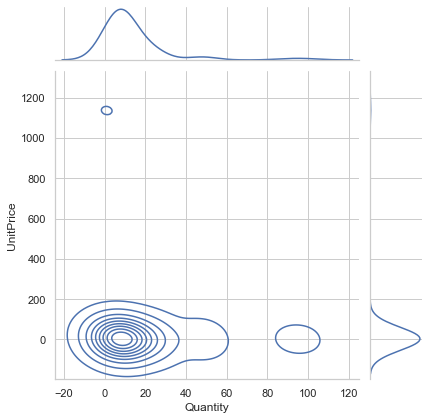

In [407]:
JPlot(Data[Data['Country']=='France'] ,'Quantity','UnitPrice','kde')

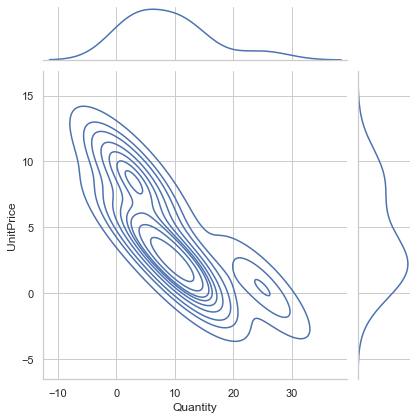

In [408]:
JPlot(Data[Data['Country']=='Italy'] ,'Quantity','UnitPrice','kde')


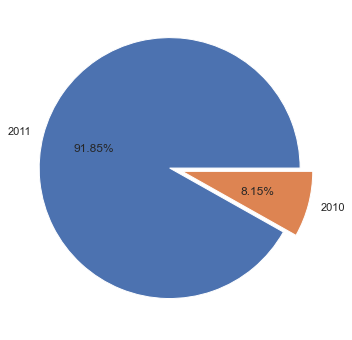

In [409]:
Pie(Data,'Year')

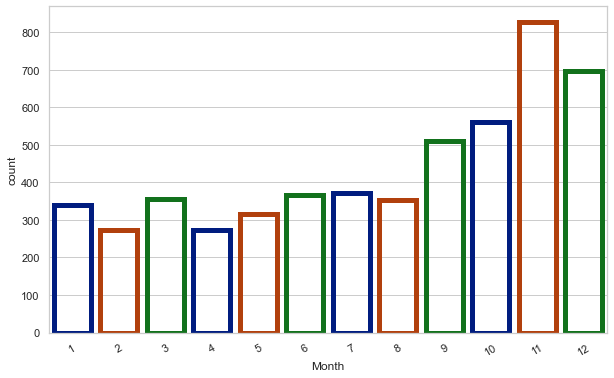

In [410]:
CPlot(Data,'Month')

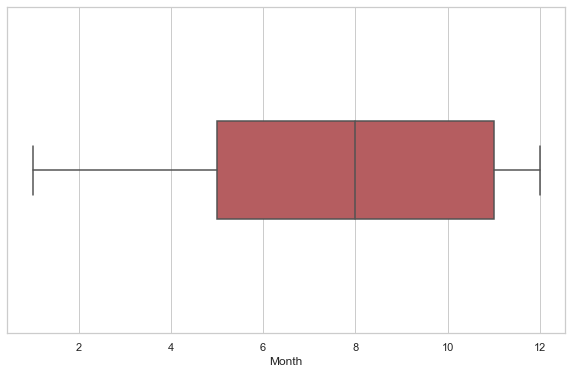

In [411]:
BPlot(Data,'Month')

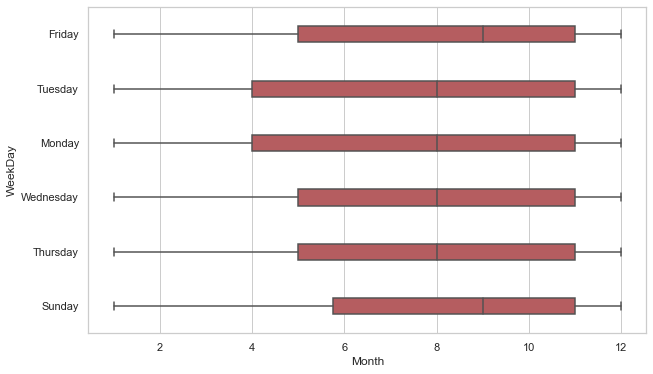

In [412]:
BPlot(Data,'Month','WeekDay')

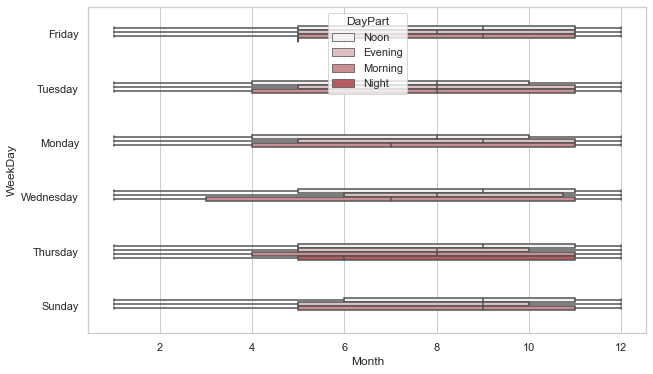

In [413]:
BPlot(Data,'Month','WeekDay','DayPart')

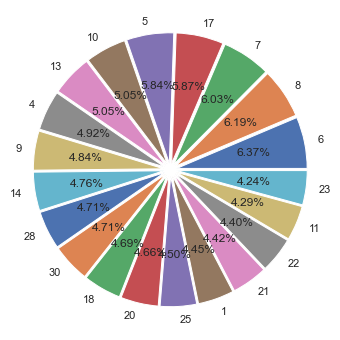

In [414]:
Pie(Data,'Day')

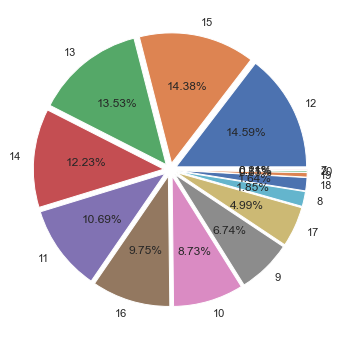

In [415]:
Pie(Data,'Hour')

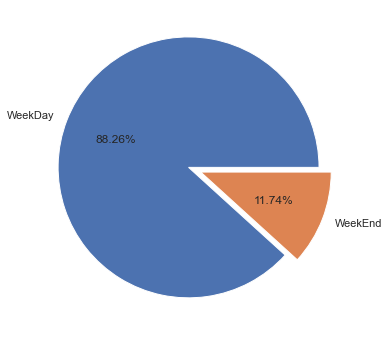

In [416]:
Pie(Data,'WeekEnd Case')

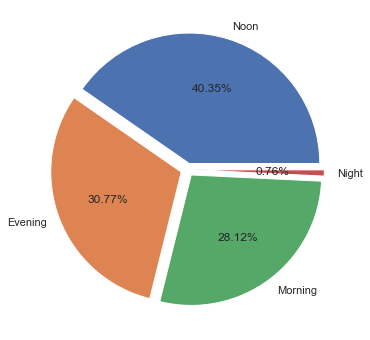

In [417]:
Pie(Data,'DayPart')


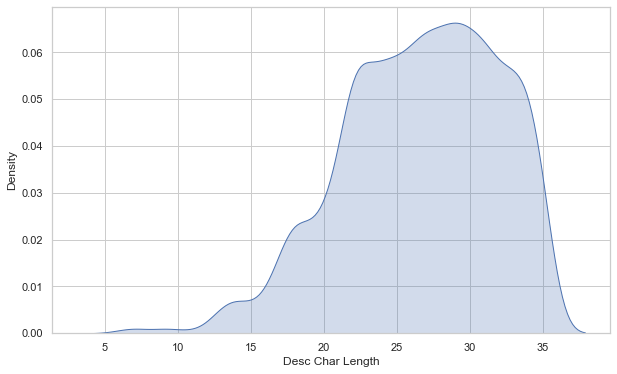

In [418]:
KPlot(Data,'Desc Char Length')

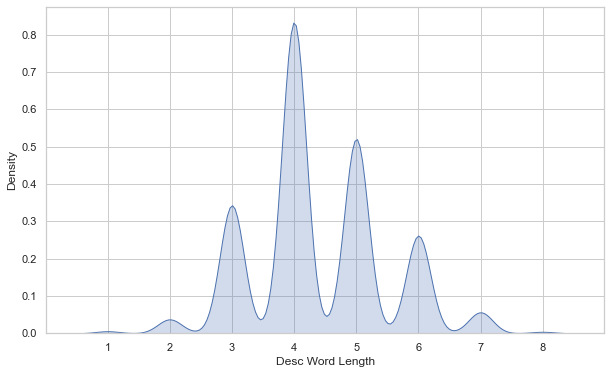

In [419]:
KPlot(Data,'Desc Word Length')

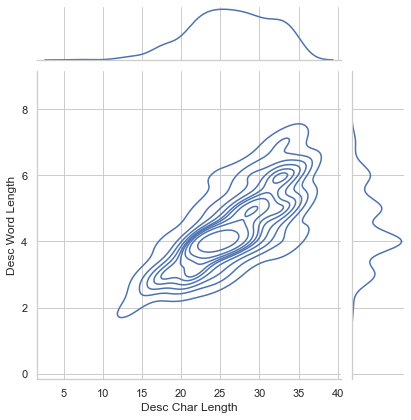

In [420]:
JPlot(Data[::10],'Desc Char Length','Desc Word Length','kde')

In [421]:
import folium
from folium.plugins import MarkerCluster

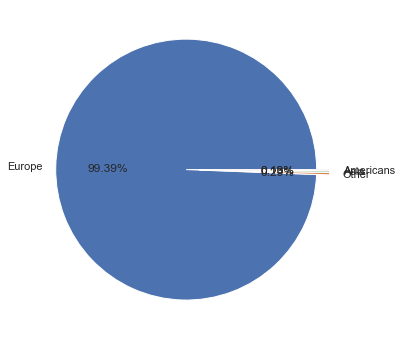

In [422]:
Pie(Data,'Continent')

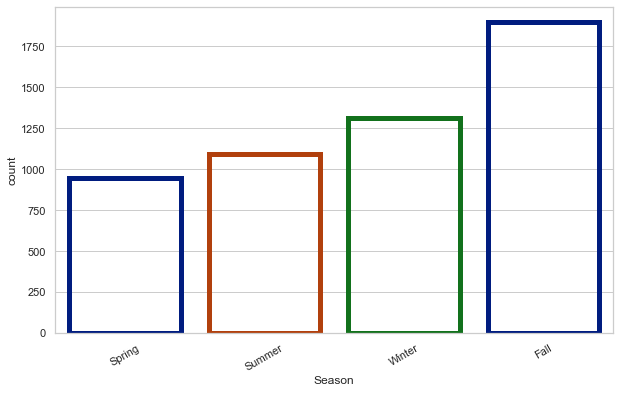

In [423]:
CPlot(Data,'Season')

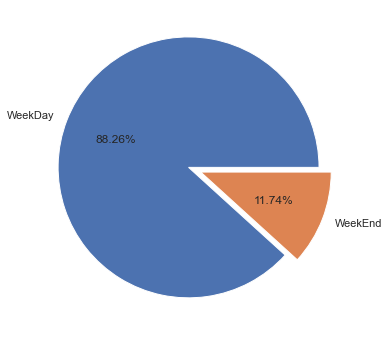

In [424]:
Pie(Data,'WeekEnd Case')

# 6) Data Preparing

In [426]:
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Palestine', 'Greece', 'Hong Kong',
       'Singapore', 'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [427]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Member,Year,Month,Day,Hour,WeekDay,WeekDayCase,DayPart,Desc Char Length,Desc Word Length,Continent,TotalPrice,Season,WeekEnd Case
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,34,5,Europe,15.30,Winter,WeekDay
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,19,3,Europe,20.34,Winter,WeekDay
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,Europe,22.00,Winter,WeekDay
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,35,6,Europe,20.34,Winter,WeekDay
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,2010,12,1,8,Wednesday,WeekDay,Morning,30,5,Europe,20.34,Winter,WeekDay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,27,5,Europe,10.20,Winter,WeekDay
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,28,4,Europe,12.60,Winter,WeekDay
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,29,4,Europe,16.60,Winter,WeekDay
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1,2011,12,9,12,Friday,WeekDay,Noon,31,4,Europe,16.60,Winter,WeekDay


# Training Apriori algorithm on the dataset

In [428]:
# Stripping extra spaces in the description
data['Description'] = data['Description'].str.strip()
  
# Dropping the rows without any invoice number
data.dropna(axis = 0, subset =['InvoiceNo'], inplace = True)
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
  
# Dropping all transactions which were done on credit
data = data[~data['InvoiceNo'].str.contains('C')]

In [429]:
data['Country'].value_counts()

United Kingdom          479985
Germany                   9025
France                    8392
EIRE                      7879
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1958
Portugal                  1492
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Palestine                  292
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon 

In [431]:
basket_UK = (data[data['Country'] == "United Kingdom"]  
        .groupby(['InvoiceNo', 'Description'])['Quantity']  
        .sum().unstack().reset_index().fillna(0)  
        .set_index('InvoiceNo'))  

In [432]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket_UK.applymap(encode_units)

In [445]:
frq_items = apriori(basket_sets, min_support=0.03, use_colnames=True)  
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)  
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])  
print(rules.head())  

                            antecedents                         consequents  \
11     (PINK REGENCY TEACUP AND SAUCER)   (GREEN REGENCY TEACUP AND SAUCER)   
19     (PINK REGENCY TEACUP AND SAUCER)   (ROSES REGENCY TEACUP AND SAUCER)   
2     (GREEN REGENCY TEACUP AND SAUCER)   (ROSES REGENCY TEACUP AND SAUCER)   
3     (ROSES REGENCY TEACUP AND SAUCER)   (GREEN REGENCY TEACUP AND SAUCER)   
20  (GARDENERS KNEELING PAD CUP OF TEA)  (GARDENERS KNEELING PAD KEEP CALM)   

    antecedent support  consequent support   support  confidence       lift  \
11            0.038959            0.051723  0.031966    0.820513  15.863541   
19            0.038959            0.053055  0.030246    0.776353  14.632960   
2             0.051723            0.053055  0.038848    0.751073  14.156468   
3             0.053055            0.051723  0.038848    0.732218  14.156468   
20            0.041623            0.049836  0.030024    0.721333  14.474059   

    leverage  conviction  
11  0.029951    5.28325

In [446]:
frq_items['length'] = frq_items['itemsets'].apply(lambda x: len(x))
frq_items

,support,itemsets,length
0,0.119984,(WHITE HANGING HEART T-LIGHT HOLDER),1
1,0.107387,(JUMBO BAG RED RETROSPOT),1
2,0.093512,(REGENCY CAKESTAND 3 TIER),1
3,0.088407,(PARTY BUNTING),1
4,0.077252,(LUNCH BAG RED RETROSPOT),1
...,...,...,...
140,0.030246,(LUNCH BAG VINTAGE DOILY),1
141,0.030246,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",2
142,0.030190,(PACK OF 60 DINOSAUR CAKE CASES),1
143,0.030135,(WOODEN BOX OF DOMINOES),1


## Defining the rules
The final step is to generate the rules with their corresponding support, confidence and lift.

In [447]:
rules = association_rules(frq_items, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.064321,0.107387,0.043565,0.677308,6.307190,0.036658,2.766147
1,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.107387,0.064321,0.043565,0.405685,6.307190,0.036658,1.574382
2,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.051723,0.053055,0.038848,0.751073,14.156468,0.036104,3.804106
3,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.053055,0.051723,0.038848,0.732218,14.156468,0.036104,3.541221
4,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.062712,0.107387,0.038737,0.617699,5.752104,0.032003,2.334845


## large lift > 1 and high confidence (0.50)

In [448]:
rules[(rules['lift'] > 1) & (rules['confidence'] >= 0.50)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.064321,0.107387,0.043565,0.677308,6.307190,0.036658,2.766147
2,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.051723,0.053055,0.038848,0.751073,14.156468,0.036104,3.804106
3,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.053055,0.051723,0.038848,0.732218,14.156468,0.036104,3.541221
4,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.062712,0.107387,0.038737,0.617699,5.752104,0.032003,2.334845
7,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.062878,0.107387,0.036462,0.579876,5.399893,0.029709,2.124645
10,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.051723,0.038959,0.031966,0.618026,15.863541,0.029951,2.515984
11,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038959,0.051723,0.031966,0.820513,15.863541,0.029951,5.283257
13,(JUMBO BAG BAROQUE BLACK WHITE),(JUMBO BAG RED RETROSPOT),0.050502,0.107387,0.031633,0.626374,5.832882,0.026210,2.389053
14,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.048615,0.051612,0.031245,0.642694,12.452370,0.028736,2.654274
15,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.051612,0.048615,0.031245,0.605376,12.452370,0.028736,2.410866


Conclusion :
- If the lift > 1,then we can say that customers buying more than 1 products combination is more frequent.But here there are no such combinations whose lift value is more than 1.

- So,there is no such combinations of creating combo pack offer